In [1]:
#This notbook evaluates  our method’s performance on a real single cell datasets,will later be updated to analize datasets:Lawlor17,Zeisel15,Li17

In [2]:
import warnings
warnings.filterwarnings("ignore")
from SCCAF import *
import urllib.request
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import KMDHierarchicalClustering.KMDclustering.cluster_scoring as cluster_scoring
import KMDHierarchicalClustering.KMDclustering.KMDAlgo as KMDAlgo


In [3]:
# download preproccesd file - dataset Zeisel 15 
urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1hprRFkEk8q27kqrt9RLvY6aqu6XWPb2C", 'Zeisel.h5')
ad = sc.read(filename="Zeisel.h5")

In [4]:
# filter overexprecced cells 
print (ad.shape)
sc.pp.filter_cells(ad, max_genes=1600)
print (ad.shape)

(3005, 2000)
(2361, 2000)


In [5]:
# convert cell names to list of cluster numbers 
label_dict = {}
index = 0
y_true = []
for cell in ad.obs['cell']:
    if cell in label_dict:
        y_true.append(label_dict[cell])
    else:
        label_dict[cell]=index
        y_true.append(label_dict[cell])
        index+=1

Predicted k is : 6
8


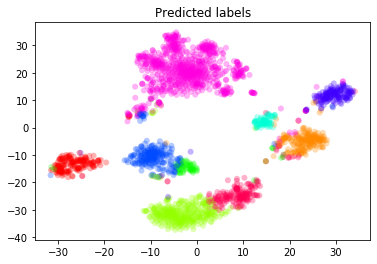

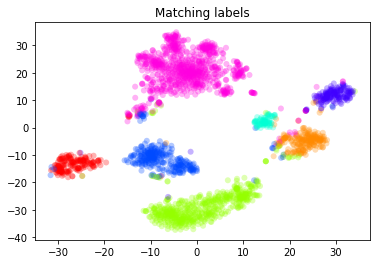

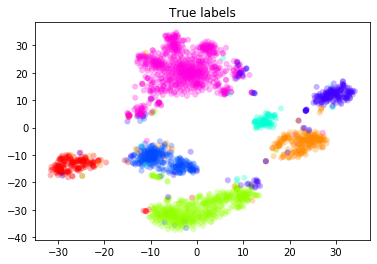

In [6]:
kmd_cluster = KMDAlgo.KMDLinkage(ad.X, k='compute',affinity = 'correlation',n_clusters=9, min_cluster_size= 10 , certainty=0.5, k_scan_range = (6,10,10))
kmd_cluster.fit(ad.X)
y_pred = kmd_cluster.predict(ad.X)
cluster_scoring.tsne_presentation(kmd_cluster.dists,y_true,y_pred)